In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score 
from nltk.corpus import stopwords
import re

In [ ]:
file = r'/content/drive/My Drive/final_project.csv'
data=pd.read_csv(file, engine='python')
data.columns=["project"]
rawlist=list(data.project)
print(rawlist)

["A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'", "A study to analyze Steel Cast Limited, a forging companys performance in comparison with its peers.\\n Used fundamental analysis of Financial Statements and calculated relevant Financial Ratios to evaluate companys status.\\n Calculated Liquidity, Financing and Performance ratios and compared with the best performer in the sector, Bharat Forge Limited.'", "Achieved a very high PSNR, currently drafting paperforthe results and algorithm.\\n Reconstruction in k-space itself. No superresolution of images. This will make t

In [ ]:
data.project[0]

"A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'"

In [ ]:
# cleaning the text
# we need to clean the data in order to get rid of the not relevant words , we need to make a bag of words model which consists of only relevant words
# also apply stemming which is the reducing higher versions of a word to its root level
# the sub method will help us clean the data first parameter means that we will not remove any letter from a-z or A-Z 
import re
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project

'A de duplication task faces two major challenges first one was that the de dup algorithm has O n   complexity  This means time required to get answer will rise exponentially as the number of records increase  This problem was solved using sorted neighborhood approach  n Second most important challenge was to achieve tradeoff between precision and recall i e  improves F  score  This problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# now we convert all uppercase letters to lowercase
project = project.lower()
project

'a de duplication task faces two major challenges first one was that the de dup algorithm has o n   complexity  this means time required to get answer will rise exponentially as the number of records increase  this problem was solved using sorted neighborhood approach  n second most important challenge was to achieve tradeoff between precision and recall i e  improves f  score  this problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# making our own custom stopwords list
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
stopwords = nltk.corpus.stopwords.words('english')
stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# cleaning the text
# split function is used to convert the string into a list of words so that we can with help of a for loop go through different words and see if its relevant or not
# the irrelevant word THIS must be removed after this
# tokenised project words excluding the words from nltk as well as our custom stopwords(3)
import re
import nltk
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
project = [word for word in project if not word in set(stopwords)]
project

['de',
 'duplication',
 'task',
 'faces',
 'two',
 'major',
 'challenges',
 'first',
 'one',
 'de',
 'dup',
 'algorithm',
 'n',
 'complexity',
 'means',
 'time',
 'required',
 'get',
 'answer',
 'rise',
 'exponentially',
 'number',
 'records',
 'increase',
 'problem',
 'solved',
 'using',
 'sorted',
 'neighborhood',
 'approach',
 'n',
 'second',
 'important',
 'challenge',
 'achieve',
 'tradeoff',
 'precision',
 'recall',
 'e',
 'improves',
 'f',
 'score',
 'problem',
 'solved',
 'using',
 'machine',
 'learning',
 'techniques',
 'collecting',
 'training',
 'data']

In [ ]:
# joining back the words to form string
#we use inverted commas with space because we want space between the different words
project = ' '.join(project)
project

'de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data'

In [ ]:
# do the above cleaning process for every review using a for loop
# corpus will be alist containig all the cleaned reviews
# stemming not applied
import re
import nltk
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,723):
    project = re.sub('[^a-zA-Z]', ' ', data.project[i])
    project = project.lower()
    project = project.split()
    project = [word for word in project if not word in set(stopwords)]
    project = ' '.join(project)
    corpus.append(project)
    #print(corpus) HERE I HAVE NOT  PRINTED THE CORPUS BECAUSE IT WAS SHOWING AN ERROR: IOPub data rate exceeded


In [ ]:
# CORPUS WITHOUT CUSTOM STOPWORDS
corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MAXIMUM OF 15 WORDS IN THE CORPUS
split_list14 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) <= 10:
    print(temp)
    split_list14.append(temp)

    sentence14 = []
for items in split_list14:
  sentence14.append(' '.join(items))

['achieved', 'accuracy', 'k', 'k', 'parameters', 'used', 'keras', 'n', 'max', 'accuracy']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['error']
['error']
['blog', 'learning', 'basics', 'analytics']
['digital', 'assistant', 'written', 'python', 'uses', 'speech', 'recognition', 'obey', 'commands']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['habit', 'tracking', 'app', 'build', 'using', 'swiftui']
['visualization', 'dashboard', 'different', 'visualizations', 'different', 'parameters']
['altrium', 'quickest', 'service', 'solve', 'homework']
['internal', 'member', 'app', 'dsckiit', 'team']
['iot', 'based', 'biometric', 'project', 'automate', 'process', 'taking', 'attendance']
['analysis', 'baseball', 'player', 'dataset', 'career', 'statistics']
['analytics', 'vidya', 'machine', 'learning', 'contests', 'solutions']
['analyzed', 'titanic', 'dataset', 'kaggle', 'used', 'pr

In [ ]:
sentence14

['achieved accuracy k k parameters used keras n max accuracy',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'error',
 'error',
 'blog learning basics analytics',
 'digital assistant written python uses speech recognition obey commands',
 'fitness app offering diet exercise plans users',
 'fitness app offering diet exercise plans users',
 'habit tracking app build using swiftui',
 'visualization dashboard different visualizations different parameters',
 'altrium quickest service solve homework',
 'internal member app dsckiit team',
 'iot based biometric project automate process taking attendance',
 'analysis baseball player dataset career statistics',
 'analytics vidya machine learning contests solutions',
 'analyzed titanic dataset kaggle used predict survival passengers onboard',
 'analyzing comparing gdps different indian states finding ways improve n',
 'android application real time bus tracking',
 'bridge detection roi sar satellite images',
 'build mod

In [ ]:
len(sentence14)

95

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MINIMUM OF 15 WORDS IN THE CORPUS
split_list15 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) > 10:
    print(temp)
    split_list15.append(temp)

    new_corpus = []
for items in split_list15:
  new_corpus.append(' '.join(items))

['de', 'duplication', 'task', 'faces', 'two', 'major', 'challenges', 'first', 'one', 'de', 'dup', 'algorithm', 'n', 'complexity', 'means', 'time', 'required', 'get', 'answer', 'rise', 'exponentially', 'number', 'records', 'increase', 'problem', 'solved', 'using', 'sorted', 'neighborhood', 'approach', 'n', 'second', 'important', 'challenge', 'achieve', 'tradeoff', 'precision', 'recall', 'e', 'improves', 'f', 'score', 'problem', 'solved', 'using', 'machine', 'learning', 'techniques', 'collecting', 'training', 'data']
['study', 'analyze', 'steel', 'cast', 'limited', 'forging', 'companys', 'performance', 'comparison', 'peers', 'n', 'used', 'fundamental', 'analysis', 'financial', 'statements', 'calculated', 'relevant', 'financial', 'ratios', 'evaluate', 'companys', 'status', 'n', 'calculated', 'liquidity', 'financing', 'performance', 'ratios', 'compared', 'best', 'performer', 'sector', 'bharat', 'forge', 'limited']
['achieved', 'high', 'psnr', 'currently', 'drafting', 'paperforthe', 'result

In [ ]:
# THIS IS OUR NEW CORPUS
new_corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
len(new_corpus)

628

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords1 = nltk.corpus.stopwords.words('english')

newStopWords = ['using','used','user','dataset', 'c', 'f', 'n', 'e','type','rating','performing','complete','sample', 'experience','develop','developed','function','design','applications','display','displayed','provide','provided','check','checked','working','high','low', 'current','computing','go','version','level','player','completed','better','level','online','people','management','type','uses','social','working','worked','important','quality','compiler','incorporating','derived','derive','upon','improoved','restaurant','please','standard','diet','refer','order', 'access',   'ease', 'skill', 'slills', 'delivery', 'require', 'required', 'requirement', 'answering', 'design','created', 'creating', 'practices', 'analyzed', 'common', 'successfully',  'adding',  'create', 'technologies', 'development','method','built', 'study', 'studied', 'given', 'review', 'value', 'done', 'result', 'proposed', 'make', 'knowledge', 'apply', 'applied',  'consists', 'description', 'approaches',   'succesfully', 'capable', 'automatically', 'challenge', 'records', 'products', 'repository', 'perform', 'performed', 'detection', 'detect', 'large', 'made', 'scale',  'display', 'video', 'help', 'helped' ,'helping',  'purpose', 'content', 'gives', 'components', 'object',  'methodology', 'problem',  'person', 'book', 'media', 'general' , 'ignore', 'two',  'customer', 'take', 'information', 'users', 'results', 'involved', 'building', 'send', 'workshop',  'team', 'skills', 'basic', 'environment', 'diagrams', 'concepts', 'succesfully', 'whether', 'variables',  'process',  'aim', 'work',  'build',  'customers',   'number', 'work', 'one', 'file', 'approach', 'day', 'related', 'case', 'new', 'benchmark', 'sense', 'iitb', 'tried', 'commands', 'event', 'provides', 'aim',  'existing', 'details', 'etc', 'search', 'food', 'first', 'input', 'output', 'booking', 'received', 'practises', 'kernel', 'loaded', 'efficient', 'detail',  'goal', 'identify', 'find',  'single', 'real', 'sudden', 'location', 'learned', 'part', 'udacity', 'task','techniques','various',  'use', 'system','provide',  'based', 'project', 'product', 'different', 'student', 'objective', 'task', 'report', 'determine', 'performance', 'model', 'data', 'implement', 'implementation', 'application', 'guide', 'prof', 'predict', 'technology', 'jupyter', 'notebook', 'project'  , 'matplotlib', 'seaborn',  'achieved', 'different', 'technique', 'developed',  'implemented', 'worked',  'code', 'document', 'word', 'based',  'google', 'colab', 'github' ]
stopwords1.extend(newStopWords)
stopwords1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:

new_corpus_customsp = []
for i in range(0,628):
  project = new_corpus[i]
  project = project.split()
  project = [word for word in project if not word in set(stopwords1)]
  project = ' '.join(project)
  new_corpus_customsp.append(project)


In [ ]:
new_corpus_customsp

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(new_corpus_customsp)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT WITH CUSTOM STOPWORDS APPLIED
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
714           learning  0.022896
626              image  0.022333
875            network  0.018623
1072            python  0.017240
882             neural  0.016779
630             images  0.016316
50            analysis  0.015929
39           algorithm  0.015651
1363           trained  0.015488
1346              time  0.014946
726               like  0.014819
10            accuracy  0.014608
488           features  0.014597
57             android  0.014112
69                 app  0.014023
756            machine  0.013823
40          algorithms  0.013622
818             models  0.013613
209     classification  0.013025
335               deep  0.012654
704           language  0.012272
883     neural network  0.011697
757   machine learning  0.011328
1220               set  0.011235
1336              text  0.010888
336      deep learning  0.010564
1056        processing  0.010457
1449           website  0.009597
231                cnn  0.009528
484            feature  0.009353

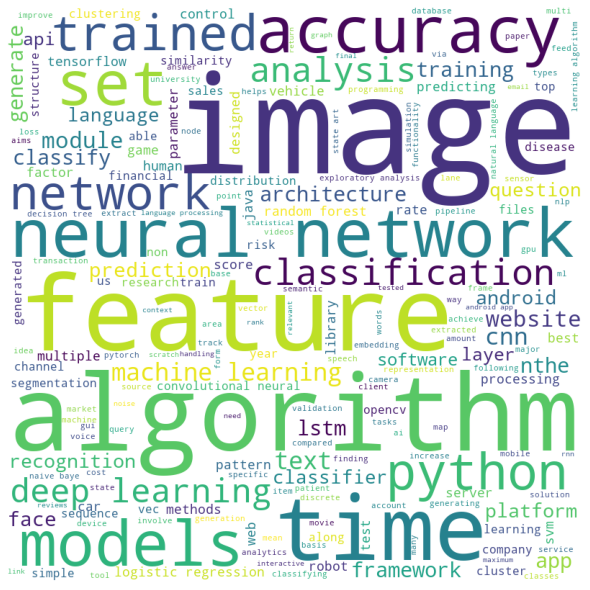

In [ ]:
new_corpus_customsp1 = ' '.join(new_corpus_customsp)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(new_corpus_customsp1) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
tfidf = TfidfVectorizer(
    min_df = 3,
    max_df = 0.7,
    max_features = None,
    stop_words = 'english'
)
tfidf.fit(new_corpus_customsp)
x = tfidf.transform(new_corpus_customsp)
x


<628x1303 sparse matrix of type '<class 'numpy.float64'>'
	with 8982 stored elements in Compressed Sparse Row format>

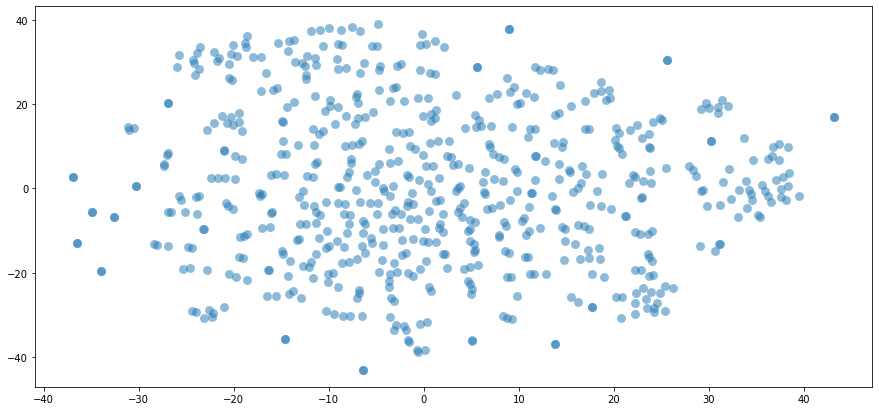

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

distance = pairwise_distances(x, metric='cosine')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 7


projection = TSNE().fit_transform(distance)
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
plt.scatter(*projection.T, **plot_kwds)

No handles with labels found to put in legend.


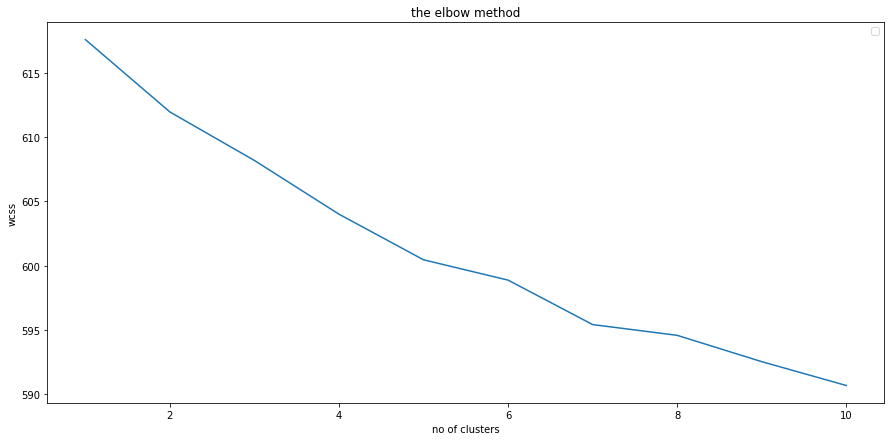

In [ ]:
# Using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0 )
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.legend()
plt.show()

In [ ]:
# Apply kmeans to the dataset
# this gives the nameof cluster to which each person belongs
kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[3 0 0 0 3 2 0 0 5 0 2 6 0 0 0 6 6 5 6 6 6 6 6 6 6 6 6 6 1 4 3 1 0 6 4 0 0
 2 2 6 0 2 2 6 0 0 2 3 0 6 3 2 2 6 6 0 6 0 2 6 2 3 6 4 0 0 3 3 2 6 2 0 2 2
 6 0 5 0 3 2 2 0 2 2 2 6 0 0 6 0 0 2 0 3 0 6 0 6 0 0 1 6 0 0 2 6 3 2 0 1 5
 0 5 0 2 3 0 0 0 3 0 1 1 0 0 0 0 4 0 0 3 0 0 3 0 2 0 6 2 0 1 1 3 0 0 0 0 3
 1 0 0 4 5 5 3 3 0 3 0 6 6 5 3 2 6 0 6 0 0 0 1 6 3 3 3 3 3 0 2 0 0 3 3 5 0
 5 6 3 0 0 3 6 0 4 4 0 2 0 0 1 0 2 1 3 0 3 0 0 0 0 0 3 0 5 3 0 4 1 2 2 0 1
 3 0 4 3 2 6 2 0 6 2 6 6 0 0 0 3 6 3 4 2 0 0 4 0 0 0 3 0 0 0 0 3 2 3 0 0 1
 1 3 1 0 1 0 4 2 0 2 0 3 5 0 3 5 0 3 0 2 6 0 0 3 3 2 0 2 1 2 4 0 4 4 3 3 3
 0 0 2 5 3 3 0 0 3 4 0 4 0 0 0 4 4 0 0 3 0 3 0 0 2 5 6 0 3 3 2 4 0 0 2 3 3
 3 5 0 0 0 0 0 0 2 2 2 0 0 3 2 0 5 0 1 1 2 6 0 0 0 2 2 2 3 3 1 6 0 0 3 3 4
 0 0 2 6 3 2 2 0 0 0 0 3 3 0 0 1 0 0 0 4 4 0 0 2 3 0 2 0 0 0 1 3 0 0 0 0 0
 6 0 3 0 0 0 2 0 0 6 6 0 4 6 0 0 6 2 6 3 0 0 3 0 0 0 5 5 2 0 6 2 0 6 5 5 3
 0 0 0 0 0 6 0 6 0 0 0 3 2 0 6 0 0 0 0 0 0 3 3 2 0 3 2 2 4 0 0 1 6 0 0 2 0
 6 6 0 3 0 0 6 0 0 6 0 0 

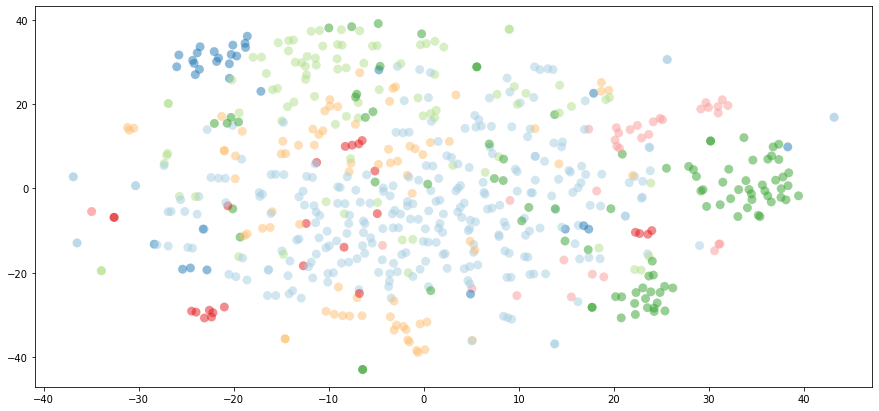

In [ ]:
color_palette = sns.color_palette('Paired', 20)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in y_kmeans]
cluster_member_colors = (cluster_colors)
plt.scatter(*projection.T, s=80, linewidth=0, c=cluster_member_colors, alpha=0.5)

In [ ]:
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] 
  
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(x) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(x, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.00387092355572954
For no of clusters = 3  The average silhouette_score is : 0.005172308218329505
For no of clusters = 4  The average silhouette_score is : 0.007520507065335967
For no of clusters = 5  The average silhouette_score is : 0.007675270889075958
For no of clusters = 6  The average silhouette_score is : 0.007812340428204534
For no of clusters = 7  The average silhouette_score is : 0.007533702964673982
For no of clusters = 8  The average silhouette_score is : 0.009351582344883435
For no of clusters = 9  The average silhouette_score is : 0.010331777778334453
For no of clusters = 10  The average silhouette_score is : 0.010540911020531753


In [ ]:
#first cluster
list1 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 0:
        list1.append(new_corpus_customsp[i])
    # no of projects in cluster 1
len(list1)

274

In [ ]:
#projects in cluster 1
list1

['analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'leading telecom firm predictive models risk churn main indicators churn filtered revenue generate telecom firm tagging churned service usage models risk churned also strong indicators churn',
 'analyzing millions financial fraudulent hand audit analytics platform leveraged collect erps rules features extraction engine rules customizable client predictive models features',
 'author pytho

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list1)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT FOR PROJECTS WITH MINIMUM 15 WORDS
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(40)

term    weight
11        algorithm  0.023768
543            time  0.023517
412          python  0.023189
314          models  0.019799
276            like  0.019320
15         analysis  0.019174
485             set  0.016798
264        language  0.016286
274         library  0.013344
385        platform  0.012638
365      parameters  0.012600
255            java  0.011853
170        features  0.011788
316          module  0.011380
80   classification  0.011230
208             gui  0.011136
427     recognition  0.010760
237          indian  0.010740
52             best  0.010695
536            test  0.010668
126        designed  0.010548
404      processing  0.010306
451           robot  0.010250
313       modelling  0.010220
105         control  0.010197
290            lstm  0.010059
586             web  0.010052
342            nthe  0.010040
37            audio  0.009793
69              car  0.009664
178       financial  0.009522
282           linux  0.009399
192   functionality  0.009320
497        software  0.009310
416       questions  0.009282
190       framework  0.009121
564      university  0.009111
118           cycle  0.009076
393      predicting  0.008834
244     interactive  0.008715

In [ ]:
list10 = ' '.join(list1)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list10)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of analyze is : 2
Frequency of steel is : 1
Frequency of cast is : 1
Frequency of limited is : 4
Frequency of forging is : 1
Frequency of companys is : 2
Frequency of comparison is : 2
Frequency of peers is : 2
Frequency of fundamental is : 1
Frequency of analysis is : 28
Frequency of financial is : 12
Frequency of statements is : 2
Frequency of calculated is : 4
Frequency of relevant is : 3
Frequency of ratios is : 2
Frequency of evaluate is : 1
Frequency of status is : 2
Frequency of liquidity is : 1
Frequency of financing is : 1
Frequency of compared is : 7
Frequency of best is : 13
Frequency of performer is : 1
Frequency of sector is : 1
Frequency of bharat is : 1
Frequency of forge is : 1
Frequency of psnr is : 1
Frequency of currently is : 3
Frequency of drafting is : 1
Frequency of paperforthe is : 1
Frequency of algorithm is : 38
Frequency of reconstruction is : 3
Frequency of k is : 8
Frequency of space is : 5
Frequency of superresolution is : 1
Frequency of images i

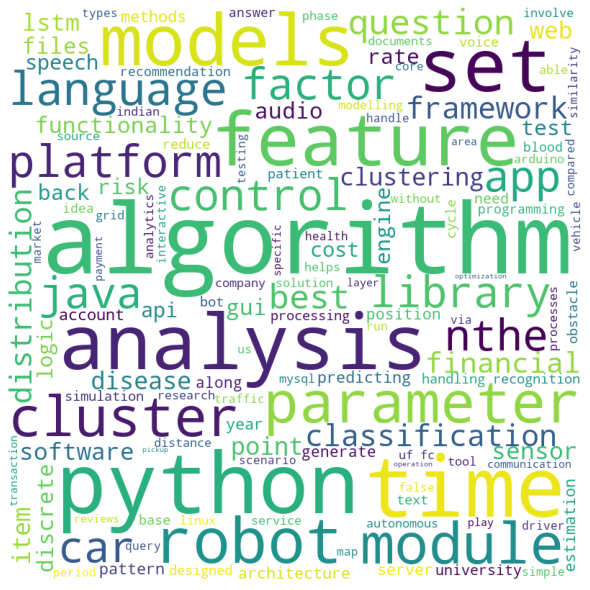

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list10) 
# plot the WordCloud image for cluster 1 min_words = 15                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list2 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 1:
        list2.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list2)

32

In [ ]:
list2

['designing software air collaborative robot detecting position aeroplane cracks corrosion inspection body aeroplane trained predefined images cracks corrosion lidar air cobot aircraft inspection capturing live image processing opencv labelling images labelme software',
 'cbir inria holidays colour histogram image ndescriptor extract features images indexed images image descriptor stored csv chi squared distance metric similarity images returned top nresults matching query image introducing deep neural network extract features nunderstanding rather image composition',
 'image generation text state art thorough literature survey come handle',
 'paper image dehazing dark channel prior guided filter refine transmission map edge preserving effect',
 'portable body mounted simple computer vision analyse gestures gesture captures image frame creates directory memory interfaced processing storage device captured image',
 'image compression linear algebra compressed image class taken heads pre

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list2)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
24        processing  0.147561
16  image processing  0.127319
17            images  0.105713
28              time  0.075229
1           analysis  0.072055
15             human  0.061698
26             robot  0.058453
23            opencv  0.057643
25            python  0.054926
19           network  0.054322
11              face  0.054308
29            vision  0.053887
8    computer vision  0.053887
7           computer  0.053887
13          features  0.051931
12           feature  0.050025
18          learning  0.044265
4             camera  0.043901
22               nin  0.043322
9               deep  0.043204
3   autonomous robot  0.040355
2         autonomous  0.040355
27        similarity  0.039584
10     deep learning  0.038202
5          capturing  0.037710
20            neural  0.035953
0          algorithm  0.033399
6              color  0.032107
14              feed  0.032055
21    neural network  0.028350

In [ ]:
list20 = ' '.join(list2)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list20)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of designing is : 2
Frequency of software is : 2
Frequency of air is : 2
Frequency of collaborative is : 1
Frequency of robot is : 5
Frequency of detecting is : 2
Frequency of position is : 1
Frequency of aeroplane is : 2
Frequency of cracks is : 2
Frequency of corrosion is : 2
Frequency of inspection is : 3
Frequency of body is : 2
Frequency of trained is : 2
Frequency of predefined is : 1
Frequency of images is : 11
Frequency of lidar is : 1
Frequency of cobot is : 1
Frequency of aircraft is : 1
Frequency of capturing is : 3
Frequency of live is : 2
Frequency of image is : 62
Frequency of processing is : 15
Frequency of opencv is : 5
Frequency of labelling is : 1
Frequency of labelme is : 1
Frequency of cbir is : 1
Frequency of inria is : 1
Frequency of holidays is : 1
Frequency of colour is : 3
Frequency of histogram is : 1
Frequency of ndescriptor is : 1
Frequency of extract is : 3
Frequency of features is : 7
Frequency of indexed is : 1
Frequency of descriptor is : 1
Fre

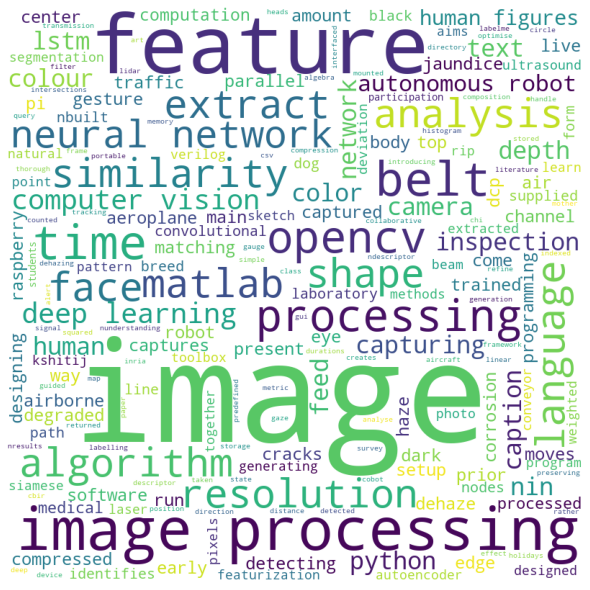

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list20) 
# plot the WordCloud image for cluster 1 min_words = 20                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list3 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 2:
        list3.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list3)

89

In [ ]:
list3

['american sign language primary language north america deaf individuals also hard hearing individuals language employs signs hand along facial gestures bodily pastures images contained hand gestures encoded alphabetic letters trained convolutional neural network classify images asl letters loading examining preprocessing trained network tested',
 'beat baseline score credibility prediction events credbank initial exploratory analysis multi hierarchical attention network operating tweet plan hierarchical transformer encoder decoder architecture improve',
 'locating pun syntactic characteristics corpus metrics uwaterloo bert produced state art increasing score sota',
 'analyst collects thousands points sources initiated automate advance natural language processing segmentation classification association extract past collected analysts training improve accuracy',
 'works network embedding consider network structure generated could potentially nhelpful learning joint network representatio

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list3)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
98                network  0.102199
104                neural  0.087067
69                 images  0.085580
155               trained  0.076372
105        neural network  0.073356
103              networks  0.051757
68                  image  0.044069
19         classification  0.043233
2                accuracy  0.040462
28          convolutional  0.037408
77               language  0.034033
106       neural networks  0.033871
29   convolutional neural  0.033337
32                   deep  0.032181
17                  class  0.031845
59               generate  0.031840
147            tensorflow  0.030166
24                    cnn  0.029914
152                  time  0.029391
142                 state  0.029378
122           recognition  0.027714
117            prediction  0.025268
9            architecture  0.025177
134          segmentation  0.024801
92                  multi  0.024476
86                   lstm  0.024361
41             embeddings  0.023648
71                improve  0.023293
21               classify  0.022678
113                 paper  0.021973

In [ ]:
list30 = ' '.join(list3)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list30)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of american is : 1
Frequency of sign is : 2
Frequency of language is : 12
Frequency of primary is : 1
Frequency of north is : 1
Frequency of america is : 1
Frequency of deaf is : 1
Frequency of individuals is : 2
Frequency of also is : 13
Frequency of hard is : 1
Frequency of hearing is : 1
Frequency of employs is : 1
Frequency of signs is : 3
Frequency of hand is : 2
Frequency of along is : 3
Frequency of facial is : 6
Frequency of gestures is : 2
Frequency of bodily is : 1
Frequency of pastures is : 1
Frequency of images is : 40
Frequency of contained is : 1
Frequency of encoded is : 1
Frequency of alphabetic is : 1
Frequency of letters is : 2
Frequency of trained is : 43
Frequency of convolutional is : 16
Frequency of neural is : 61
Frequency of network is : 76
Frequency of classify is : 9
Frequency of asl is : 1
Frequency of loading is : 1
Frequency of examining is : 1
Frequency of preprocessing is : 3
Frequency of tested is : 2
Frequency of beat is : 1
Frequency of basel

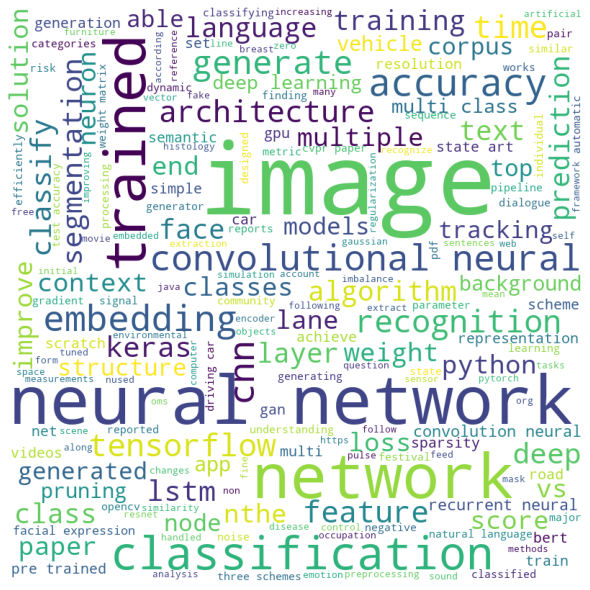

In [ ]:
list30 = ' '.join(list3)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list30) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list4 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 3:
        list4.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list4)

97

In [ ]:
list4

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs achieve scalable web crawler get job descriptions websites job descriptions resume processed text mining extract finally predictive jobs similar resume',
 'bidirectional autoencoder extracted context nreference get softmax probabilities possible answers question extracted edges relations commonsense corporas like conceptnet nell making commonsense inclusive vectors relations extracted like conceptnet numberbatch nresearch areas natural language processing machine learning',
 'novel emotions like happy sad angry textual conversations na tree lstm deep learning variation tree lstm behavior negative posi

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list4)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
72           learning  0.126553
82            machine  0.097919
10            android  0.096987
83   machine learning  0.082980
34               deep  0.067473
15                app  0.066948
35      deep learning  0.066824
7           algorithm  0.037565
78               like  0.035877
24     classification  0.034564
119            python  0.031922
8          algorithms  0.031438
48           features  0.030951
146          training  0.029039
11        android app  0.028632
9            analysis  0.025852
61              image  0.025412
143              time  0.024731
152              yolo  0.024670
91             models  0.023721
92             module  0.023528
28                cnn  0.022776
14                api  0.022470
27         clustering  0.021256
133            server  0.021215
2            accuracy  0.020282
137             state  0.020039
62             images  0.019956
151          websites  0.019871
126       recognition  0.019841

In [ ]:
list40 = ' '.join(list4)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list40)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of de is : 2
Frequency of duplication is : 1
Frequency of faces is : 3
Frequency of major is : 1
Frequency of challenges is : 1
Frequency of dup is : 1
Frequency of algorithm is : 17
Frequency of complexity is : 1
Frequency of means is : 3
Frequency of time is : 11
Frequency of get is : 5
Frequency of answer is : 3
Frequency of rise is : 1
Frequency of exponentially is : 1
Frequency of increase is : 2
Frequency of solved is : 2
Frequency of sorted is : 1
Frequency of neighborhood is : 1
Frequency of second is : 2
Frequency of achieve is : 4
Frequency of tradeoff is : 1
Frequency of precision is : 2
Frequency of recall is : 1
Frequency of improves is : 1
Frequency of score is : 3
Frequency of machine is : 47
Frequency of learning is : 95
Frequency of collecting is : 3
Frequency of training is : 12
Frequency of side is : 2
Frequency of simple is : 3
Frequency of interface is : 5
Frequency of personalize is : 1
Frequency of scalable is : 2
Frequency of responsive is : 1
Frequenc

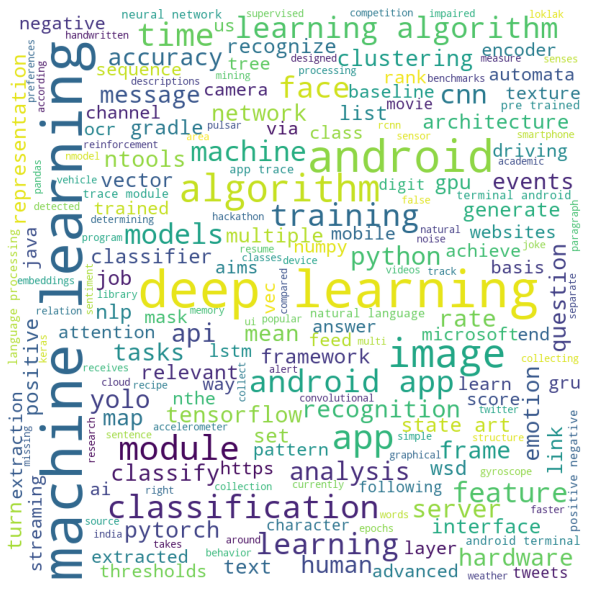

In [ ]:
list40 = ' '.join(list4)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list40) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list5 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 4:
        list5.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list5)

34

In [ ]:
list5

['shooting game pygame end animations maximize score shooting enemy spaceships asteroids',
 'players elaborate manual workflow evaluate nevaluation players multi million dollar industry generate four times revenue compared calculate entire game digitalized cameras iot devices cloud gpus tensorflow computer vision fr cnn models step game enabled valuation fraud models',
 'accounting reasons wastage water farm conceiveing features developing models could total cost total returns types crops fabricating combining roles modern machines crop neural networks estimating weightage amount water final produce simple regression reconciling visualisation website',
 'distributed database front end insert view delete patient nfragmented tables distributing state wise sqlplus oracle db php javascript w css',
 'website showcase photography interested photographers nthe website html css javascript ncurrently website four contributors photographs ni server side website respond requests feedback nhave lo

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list5)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
8             game  0.244960
22         website  0.236118
9             html  0.099442
5              end  0.098635
1              css  0.095473
10        html css  0.083980
12      javascript  0.080384
6         features  0.076995
13            like  0.071391
11            java  0.067090
18          server  0.061012
0              app  0.058814
21             web  0.057998
15             php  0.056084
3         database  0.055253
20        software  0.054885
14           mysql  0.052489
2   css javascript  0.048548
19            site  0.047112
23    website like  0.045146
16       php mysql  0.043930
17        platform  0.043697
7        framework  0.038536
4           django  0.037000

In [ ]:
list50 = ' '.join(list5)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list50)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of shooting is : 3
Frequency of game is : 14
Frequency of pygame is : 1
Frequency of end is : 8
Frequency of animations is : 1
Frequency of maximize is : 1
Frequency of score is : 1
Frequency of enemy is : 1
Frequency of spaceships is : 1
Frequency of asteroids is : 1
Frequency of players is : 2
Frequency of elaborate is : 1
Frequency of manual is : 1
Frequency of workflow is : 1
Frequency of evaluate is : 1
Frequency of nevaluation is : 1
Frequency of multi is : 1
Frequency of million is : 1
Frequency of dollar is : 1
Frequency of industry is : 1
Frequency of generate is : 1
Frequency of four is : 2
Frequency of times is : 1
Frequency of revenue is : 1
Frequency of compared is : 1
Frequency of calculate is : 1
Frequency of entire is : 2
Frequency of digitalized is : 1
Frequency of cameras is : 1
Frequency of iot is : 2
Frequency of devices is : 1
Frequency of cloud is : 2
Frequency of gpus is : 1
Frequency of tensorflow is : 1
Frequency of computer is : 2
Frequency of vision

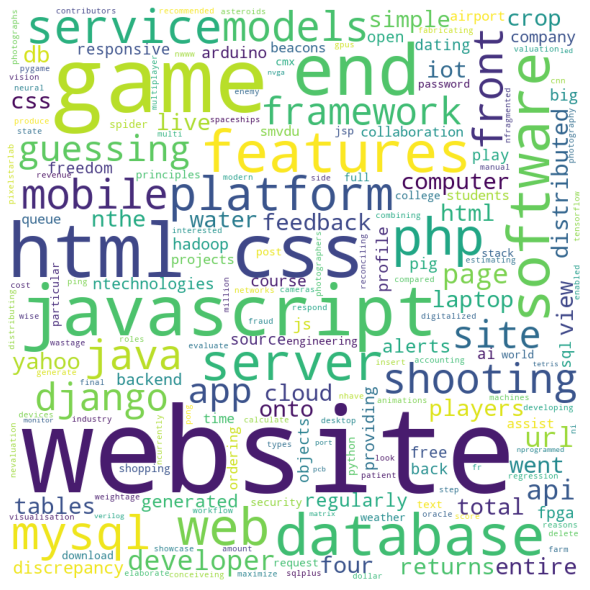

In [ ]:
list50 = ' '.join(list5)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list50) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list6 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 5:
        list6.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list6)

25

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list6)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
31                 sales  0.211214
15              modeling  0.123438
20                moving  0.121627
27                 price  0.109128
35                  tool  0.086981
33                 stock  0.086371
10              included  0.072636
25           preparation  0.071157
2              algorithm  0.071137
32                   sas  0.060928
3               analysis  0.060837
12             marketing  0.057434
23             predicted  0.055754
4                    big  0.054535
0               accuracy  0.053846
5              evaluated  0.049893
26  preparation modeling  0.049860
22     ndata preparation  0.049860
21                 ndata  0.049860
18         modeling tool  0.049860
30            regression  0.049029
34           stock price  0.043597
19                models  0.040994
9                 future  0.040672
29         random forest  0.040465
8                 forest  0.040465
28                random  0.040465
24            predictive  0.038747
7   exploratory analysis  0.036995
6            exploratory  0.036995

In [ ]:
list60 = ' '.join(list6)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list60)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of algorithm is : 3
Frequency of dynamic is : 1
Frequency of maze is : 1
Frequency of moving is : 5
Frequency of obstacles is : 1
Frequency of path is : 1
Frequency of source is : 1
Frequency of destination is : 1
Frequency of credit is : 1
Frequency of risk is : 2
Frequency of validation is : 4
Frequency of engagements is : 2
Frequency of aimed is : 1
Frequency of making is : 1
Frequency of banks is : 1
Frequency of basel is : 1
Frequency of ii is : 1
Frequency of compliant is : 1
Frequency of broken is : 1
Frequency of preparation is : 8
Frequency of stage is : 3
Frequency of step is : 1
Frequency of included is : 4
Frequency of creation is : 1
Frequency of list is : 1
Frequency of co is : 1
Frequency of ordination is : 1
Frequency of client is : 1
Frequency of get is : 2
Frequency of ensure is : 1
Frequency of correctness is : 1
Frequency of examined is : 1
Frequency of features is : 1
Frequency of affecting is : 2
Frequency of sales is : 16
Frequency of big is : 3
Frequen

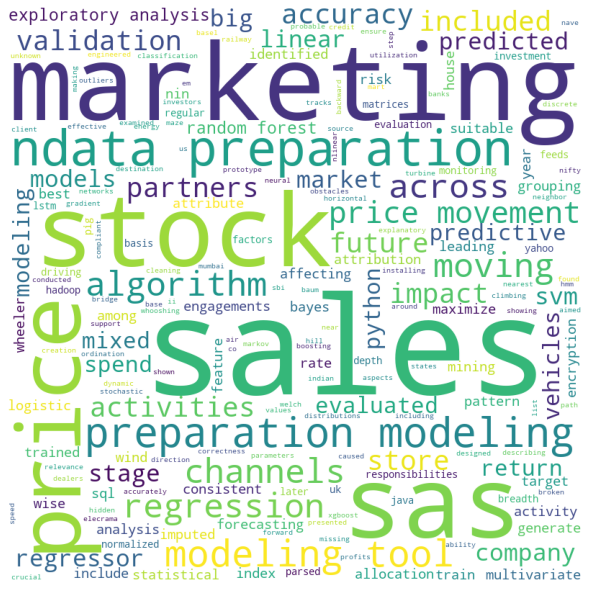

In [ ]:
list60 = ' '.join(list6)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list60) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list7 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 6:
        list7.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list7)

77

In [ ]:
list7

['end end pipeline abnormalities chest x ray top chexpert chest x ray competition nhttps stanfordmlgroup io competitions chexpert stanford datasets chest x ray images multiple image processing balancing adaptive histogram equalization augmentation classification densenet architecture improving accuracy disease ensemble models',
 'clients many erps sap oracle financial maintain financial though erps captured analysis remains client audit analytics platform transform interface conducting exploratory analysis visualization analytics tools anomaly duplication top designing scripts get erps etl scripts transform understanding business problems crating interactive exploration visualization templates feature engineering training anomaly algorithms',
 'email address tracked many teams often cause delay email assigned wrong manually assigning sophisticated text mining pipeline python rapidminer easticnet adaboost algorithms tfidf partial pca feature engineering achieving much accuracy',
 'revie

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list7)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
0               accuracy  0.075687
4             algorithms  0.072649
68              features  0.059337
7               analysis  0.057020
156                 text  0.055478
65               feature  0.047782
147                  set  0.044990
128               random  0.044623
125               python  0.043510
86                  like  0.043065
133           regression  0.039978
32            classifier  0.039105
71                forest  0.038831
129        random forest  0.038831
123           prediction  0.038320
98                models  0.038087
33              classify  0.035964
47              decision  0.033899
91              logistic  0.033180
92   logistic regression  0.033180
177        visualization  0.032873
35              cleaning  0.030453
55                   end  0.030160
181                words  0.029598
97                    ml  0.029538
167                 tree  0.028488
48         decision tree  0.028488
38                   cnn  0.028374
73               genetic  0.028300
151           supervised  0.027380

In [ ]:
list70 = ' '.join(list7)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list70)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of end is : 12
Frequency of pipeline is : 6
Frequency of abnormalities is : 1
Frequency of chest is : 3
Frequency of x is : 4
Frequency of ray is : 4
Frequency of top is : 5
Frequency of chexpert is : 2
Frequency of competition is : 1
Frequency of nhttps is : 1
Frequency of stanfordmlgroup is : 1
Frequency of io is : 1
Frequency of competitions is : 1
Frequency of stanford is : 2
Frequency of datasets is : 3
Frequency of images is : 3
Frequency of multiple is : 3
Frequency of image is : 1
Frequency of processing is : 2
Frequency of balancing is : 1
Frequency of adaptive is : 1
Frequency of histogram is : 1
Frequency of equalization is : 1
Frequency of augmentation is : 2
Frequency of classification is : 10
Frequency of densenet is : 1
Frequency of architecture is : 3
Frequency of improving is : 2
Frequency of accuracy is : 38
Frequency of disease is : 3
Frequency of ensemble is : 5
Frequency of models is : 15
Frequency of clients is : 1
Frequency of many is : 3
Frequency of e

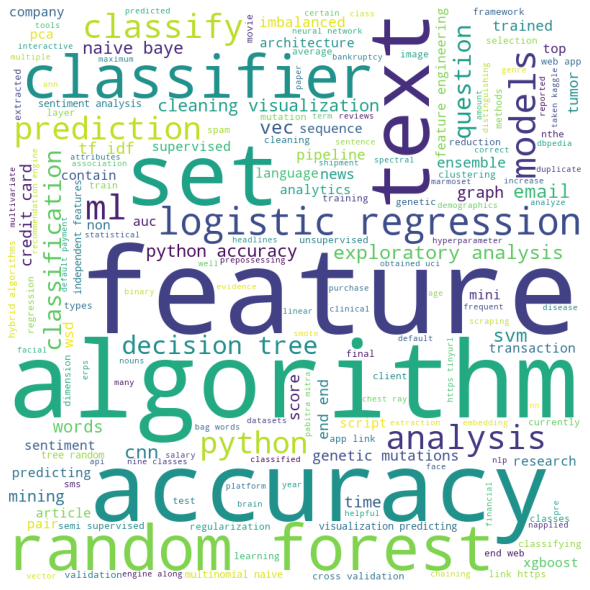

In [ ]:
list70 = ' '.join(list7)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list70) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 